In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 10)                23050     
                                                                 
Total params: 23466 (91.66 KB)
Trainable params: 23466 (91.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 10s 8ms/step - loss: 5.4605 - accuracy: 0.8025
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.3581 - accuracy: 0.9478
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1391 - accuracy: 0.9693
Epoch 4/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0770 - accuracy: 0.9798
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0513 - accuracy: 0.9859
Epoch 6/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0394 - accuracy: 0.9883
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0286 - accuracy: 0.9912
Epoch 8/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0245 - accuracy: 0.9927
Epoch 9/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 10/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0163 - accuracy: 0.9

In [ ]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9796
0.9796000123023987


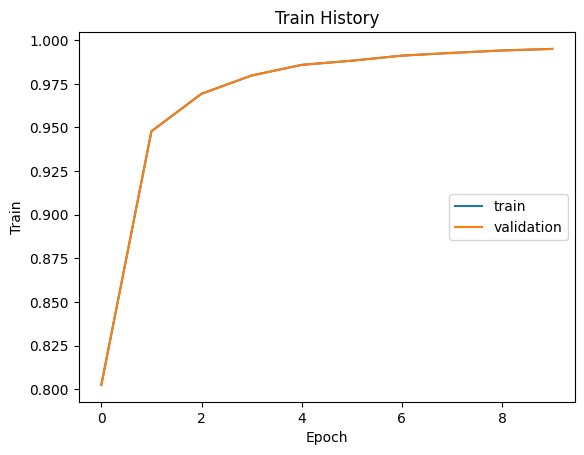

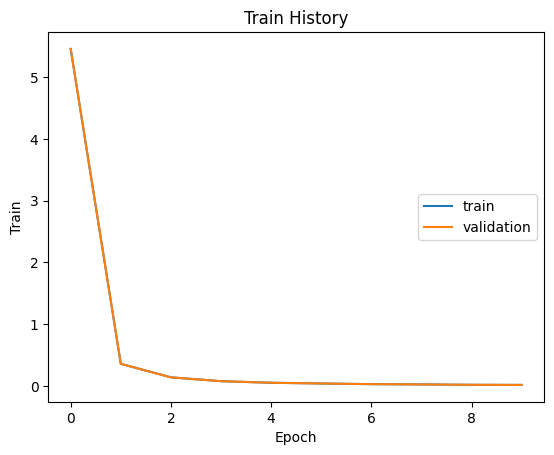

313/313 [==============================] - 1s 2ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,2,0,1,0,2,1,2,0
1,0,1126,2,2,1,0,2,0,2,0
2,3,6,1007,0,4,0,4,5,3,0
3,2,0,1,989,0,12,0,3,3,0
4,1,1,0,0,970,0,5,1,1,3
5,2,0,1,6,0,875,1,0,4,3
6,5,2,0,1,4,3,942,0,1,0
7,0,2,7,1,2,1,0,1010,4,1
8,12,1,1,1,2,2,4,2,946,3


In [ ]:
#繪製正確性與損失立歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])